### sigmoid function

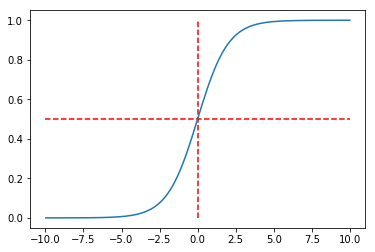

In [86]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from math import exp
def sigmiod(x):
    return 1./(1.+exp(-x))
X=np.random.uniform(-10,10,500)
y=[sigmiod(x) for x in X]
plt.plot(X[np.argsort(X)],np.array(y)[np.argsort(X)])
plt.vlines(0, 0, 1., colors = "r", linestyles = "dashed")
plt.hlines(0.5, -10., 10,colors = "r", linestyles = "dashed")
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [88]:
original_data=datasets.load_iris()
ori_X,ori_y=original_data.data,original_data.target

In [89]:
X=ori_X[ori_y<2,:2]
y=ori_y[ori_y<2]
print X.shape,y.shape

(100L, 2L) (100L,)


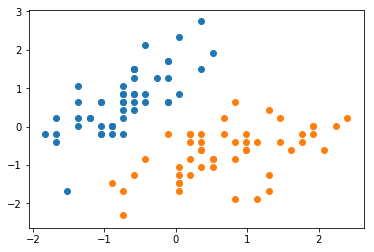

In [90]:
st=StandardScaler()
st.fit(X)
X=st.transform(X)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33)

In [92]:
log_cls=LogisticRegression()
log_cls.fit(X_train,y_train)
log_cls.score(X_test,y_test)

0.95999999999999996

In [93]:
knn_cls=KNeighborsClassifier()
knn_cls.fit(X_train,y_train)
knn_cls.score(X_test,y_test)


0.95999999999999996

### 决策边界

In [94]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

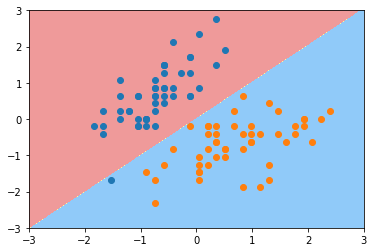

In [95]:
plot_decision_boundary(log_cls,axis=[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

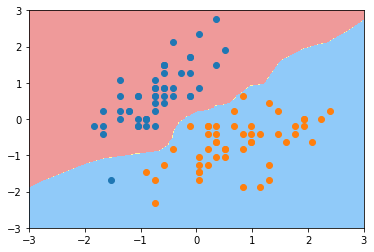

In [96]:
plot_decision_boundary(knn_cls,axis=[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [97]:
### 添加多项式特征实现非线性分类
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [98]:
### 生成样本数据
X=np.random.normal(0,1,size=(300,2))
y=np.array((X[:,0]**2+X[:,1])<1,dtype='int')
print X.shape
print y.shape
#添加噪声
for _ in range(20):
    y[np.random.randint(200)] = 1

(300L, 2L)
(300L,)


In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=333)

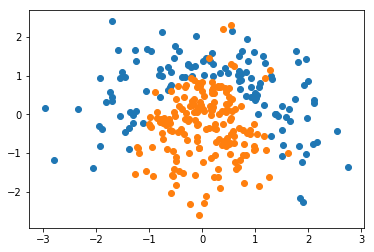

In [100]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [106]:
poly_log_reg  = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [110]:
print poly_log_reg.score(X_train, y_train)
print poly_log_reg.score(X_test, y_test)

0.924444444444
0.946666666667


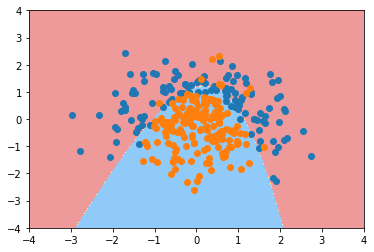

In [111]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 处理多分类任务

In [113]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [115]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print log_reg
log_reg.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


0.94736842105263153

In [116]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
print log_reg2
log_reg2.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


0.97368421052631582

### 使用sklearn封装的多分类任务分类器

In [ ]:
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier